In [ ]:
from datetime import date
studentName="Gauri Damle"
studentEmail="damle.g@northeastern.edu"
homework=7
contributedPercentage=0
print('\033[1m' + 'IE 7300: Statistical learning for Engineering' + '\033[0m')
print("\n"*15)
print(f'Homework -{homework}')
print(f'Student name :{studentName}')
print(f'Student Email :{studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7300: Statistical learning for Engineering
















Homework -7
Student name :Gauri Damle
Student Email :damle.g@northeastern.edu
















Percentage of Effort Contributed by Student : 0%
Submission Date: 2022-11-02


In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/SemesterThree/Stats7300/Assignment7/homework7template/Homework7.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SemesterThree/Stats7300/Assignment7/homework7template/Homework7.ipynb to html
[NbConvertApp] Writing 1197680 bytes to /content/drive/MyDrive/SemesterThree/Stats7300/Assignment7/homework7template/Homework7.html


## Importing Modules

In [ ]:
import warnings
warnings.filterwarnings("ignore")



#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
from sklearn.utils import shuffle
import statsmodels.api as sm
import itertools
import time
from mpl_toolkits import mplot3d
import numpy as np
from numpy.core.umath_tests import inner1d
from copy import deepcopy



#Preprocessing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Split the training and test dataset
from sklearn.model_selection import train_test_split




### performance matrix
from sklearn.metrics import mean_squared_error, r2_score

## Question

Create custom regression models using the (https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) and evaluate your model results. Split the dataset into training and test dataset 80:20.

 a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy. (4x2.5=10 points) 

 b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model. (4x2.5=10 points)

 c) Do you see any bias and variance issues? How do you interpret each model output? (4x2.5=10 points)

d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence. (5 points)

Note: Do not use any libraries, and do not copy and paste some content from other blogs or books. Write your own answer.

Find the working Lasso , Decision tree regression,  Random forest and GradientBoost regression models here.  If you are struggling with any coding, start with the code and make your changes on top of that. This template also has your title page code snippet.  homework7 template.zipDownload homework7 template.zip  

Provide your report with the following format

1. Proper title page

2. Proper question #

3. Your updated code should be in github or attached here in reading format. DO NOT RESUBMIT WITH THE SAME .ZIP file format. We have to read it through the canvas.

3. Incorporate all the previous homework comments.



## Loading statmodels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# list the contents of your directory
!ls "/content/drive/MyDrive/SemesterThree/Stats7300/Assignment7/homework7template"

 Assignment6.ipynb	   Homework7.ipynb	        statmodels
 energydata_complete.csv  'homework 7 template.ipynb'


In [ ]:
#copy the contents of your directory
!cp -r /content/drive/MyDrive/SemesterThree/Stats7300/Assignment7/homework7template/statmodels/ /content

In [ ]:
#Custom decision tree regressor
from statmodels.decisiontrees import decisiontreeregressor
#Custom random forest regressor
from statmodels.random_forest import RandomForestRegressor
#Custom lasso regressor
from statmodels.regression import LassoRegression
#Custom gradient boosting regressor
from statmodels.gradientboosting import GradientBoostTreeRegressor

In [ ]:
#Custom decision tree regressor
from statmodels.Custom_decisiontree.DecisionTreeRegressor import DecisionTreeRegressor

## Input Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SemesterThree/Stats7300/Assignment7/homework7template/energydata_complete.csv')

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
data.shape

(19735, 29)

## Null checks

In [ ]:
data.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No null records are observed.

## Duplication checks

In [ ]:
data.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

## Summary Statistics

In [ ]:
data.describe(include='all').T

From this summary statistics we can conclude following:-

On average of Appliances, energy use in Wh is 97.69.

Lights, energy use of light fixtures in the house in Wh is categorical value with min 0 and max 70.


- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %

Tempreture inside the various rooms is on average 20 degrees and Humidity values range from 20 to 90 based on room or bathroom.

On the other hand the tempreture and humidity values outside building show the expected difference in values with min tempreture in negative -6.065 to max 30 and humidity from 1 to 100 in their respective units.

- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %

The tempreture from weather station is observed to be 7 degrees on avg and humid conditions of 80% with 755 mm hg pressure. Other continuous fetures like windspeed, visibility and tdewpoint are mesured at weather station with min, max range.

- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

From here we can see the Continouous and categotical features with their data types. 

In [ ]:
data['lights'].unique()

array([30, 40, 50, 70, 60, 10, 20,  0])

lights is only categotical feature, rest all feature are continuous values.

## Feature Engineering

As the Dataset is having multiple Freature most important factor is to identify irrelavent features. 

This part in feature Engineering covers removing those irrelevant features to begin with.

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional



In [ ]:
data = data.drop(['rv1', 'rv2'], axis=1)

In [ ]:
data = data.drop(['date'], axis=1)

As these are not affecting target varible they are excluded as part of feature engineering

## EDA Univariate Analysis

For Univariate analysis lets first divide the features in **continuous** and **categorical**.

In [ ]:
categ_col = ['lights']
## all other features are continuous 

In [ ]:
data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'],
      dtype='object')

We perform univariate analysis to check the distributions (using Histograms and box plot) of all continuous variables and understand their statistical inference.

Similarly for categorical variables we check their bar plots and visualiza them.

Feature Name : Appliances
Skew : 3.39


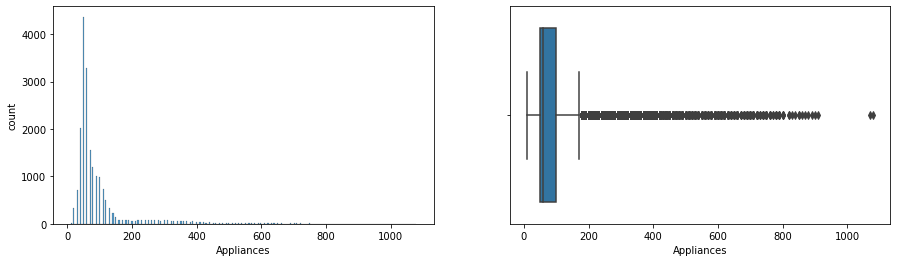

Feature Name : lights
Skew : 2.2


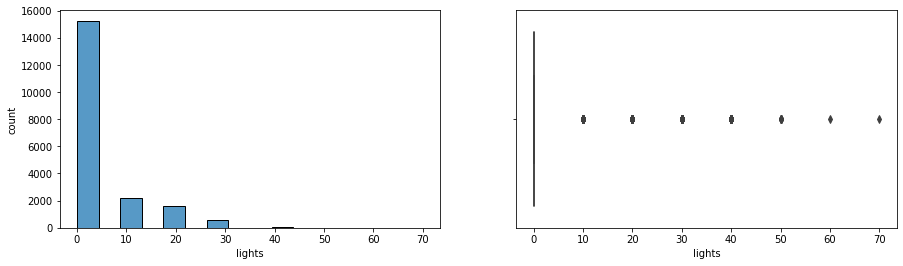

Feature Name : T1
Skew : 0.12


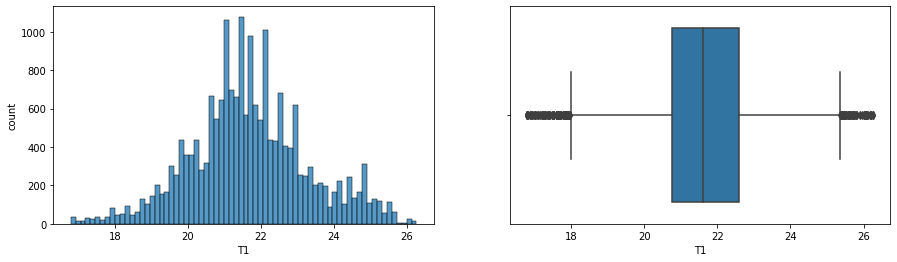

Feature Name : RH_1
Skew : 0.47


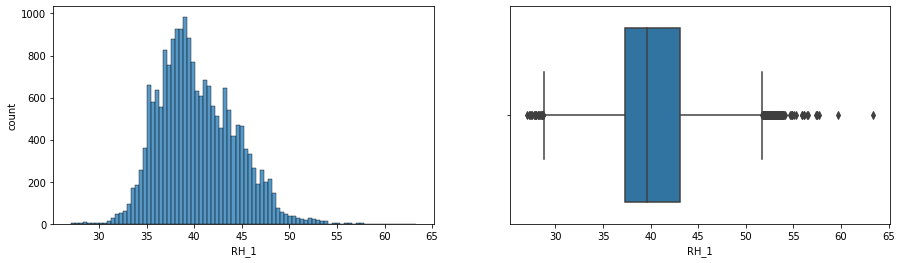

Feature Name : T2
Skew : 0.89


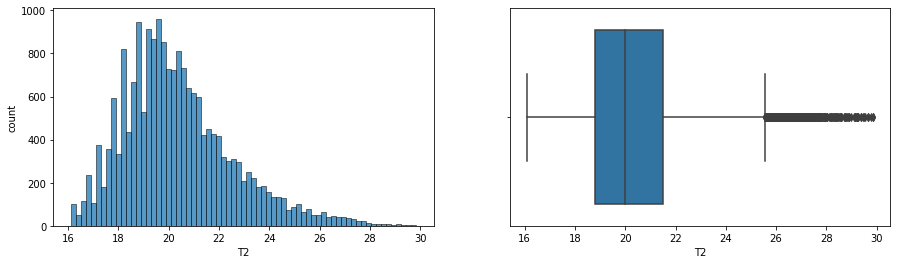

Feature Name : RH_2
Skew : -0.27


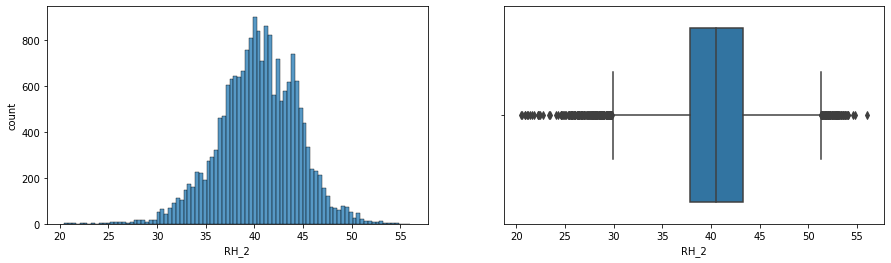

Feature Name : T3
Skew : 0.45


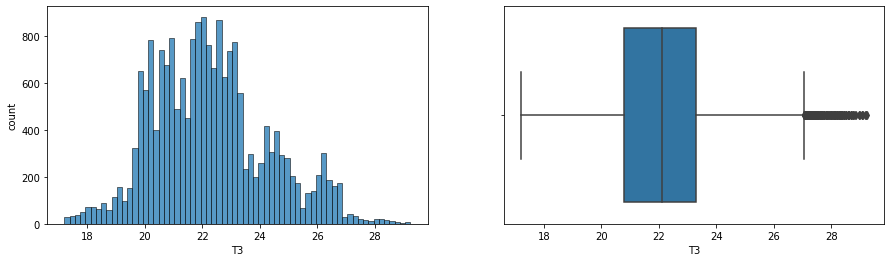

Feature Name : RH_3
Skew : 0.47


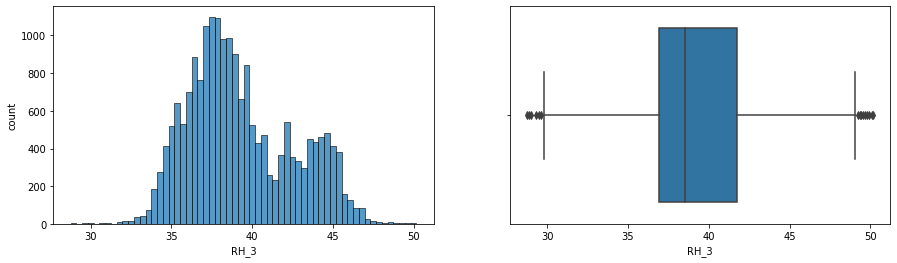

Feature Name : T4
Skew : 0.17


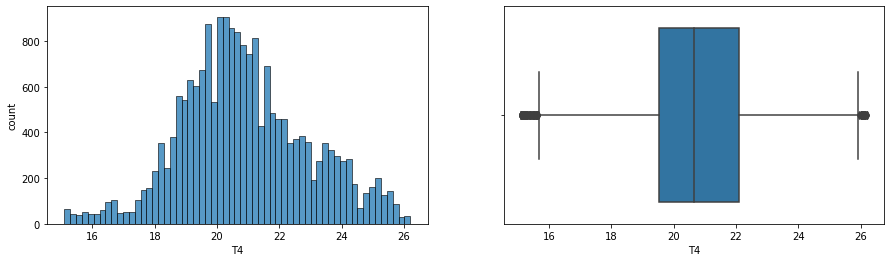

Feature Name : RH_4
Skew : 0.44


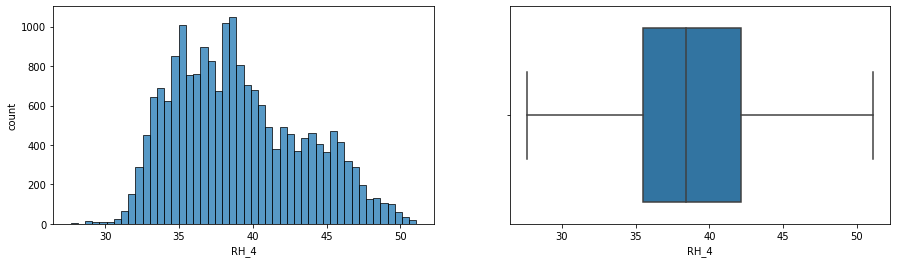

Feature Name : T5
Skew : 0.56


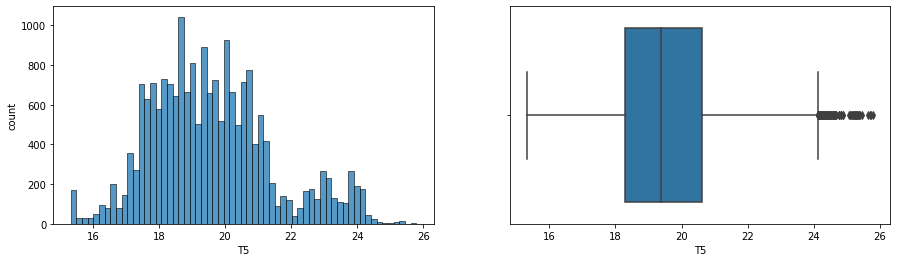

Feature Name : RH_5
Skew : 1.87


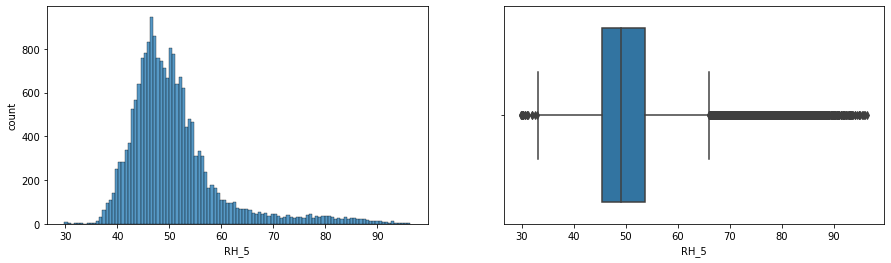

Feature Name : T6
Skew : 0.6


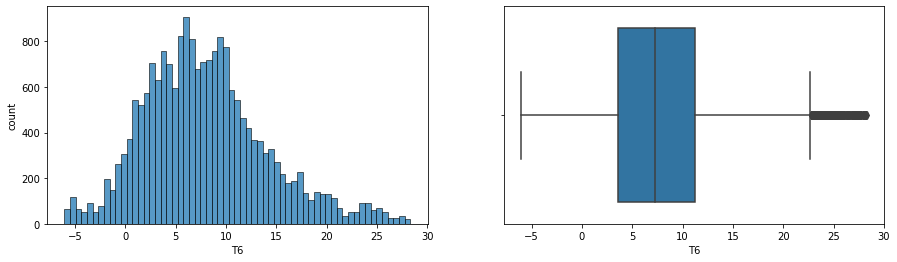

Feature Name : RH_6
Skew : -0.24


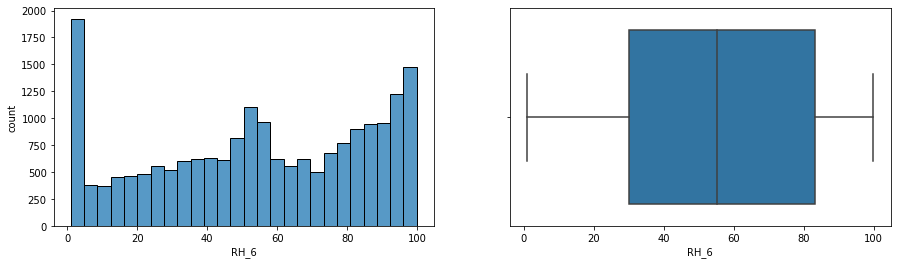

Feature Name : T7
Skew : 0.25


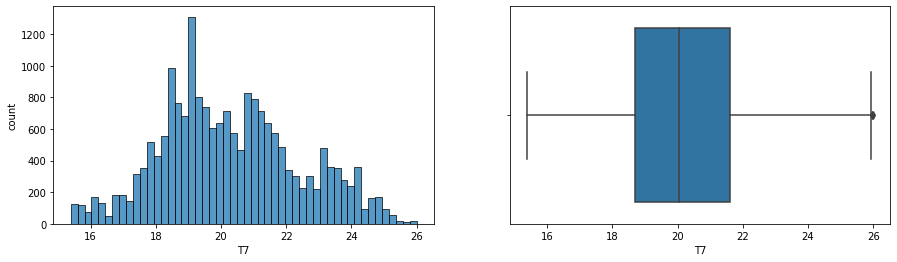

Feature Name : RH_7
Skew : 0.24


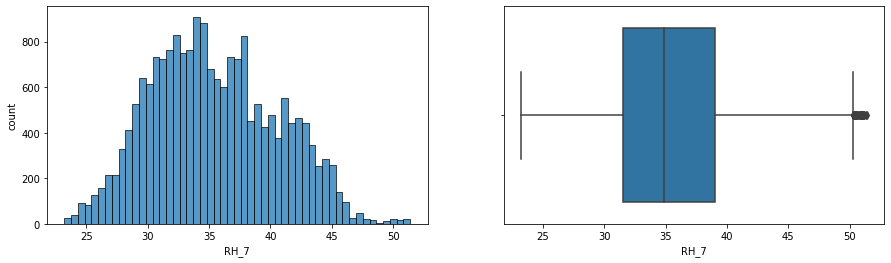

Feature Name : T8
Skew : -0.26


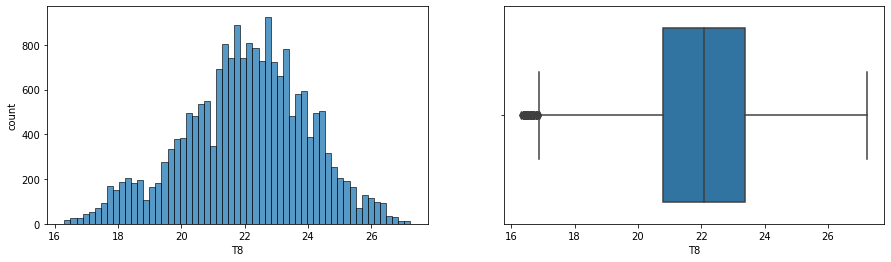

Feature Name : RH_8
Skew : 0.31


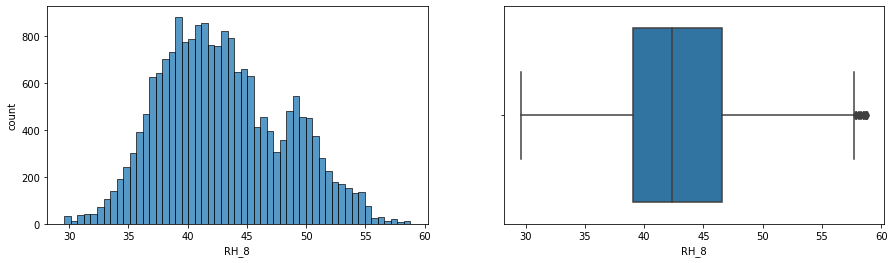

Feature Name : T9
Skew : 0.38


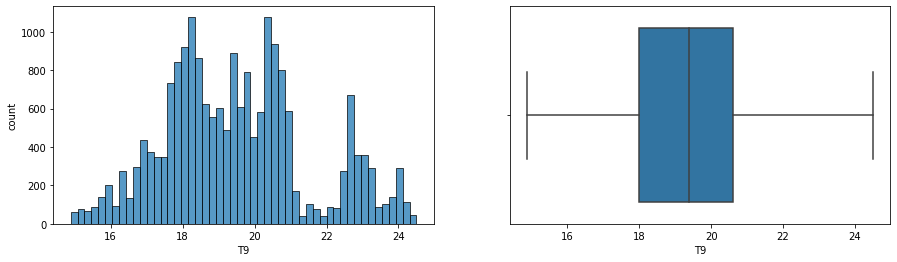

Feature Name : RH_9
Skew : 0.37


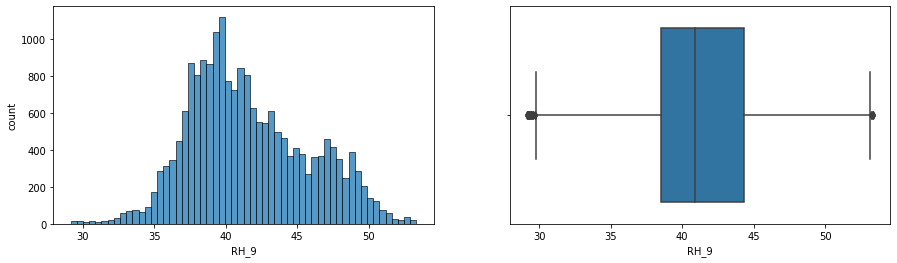

Feature Name : T_out
Skew : 0.53


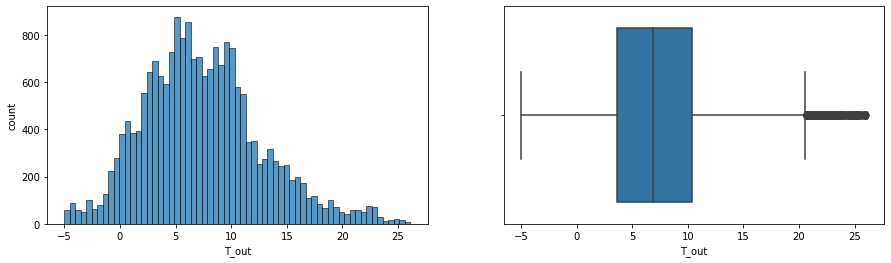

Feature Name : Press_mm_hg
Skew : -0.42


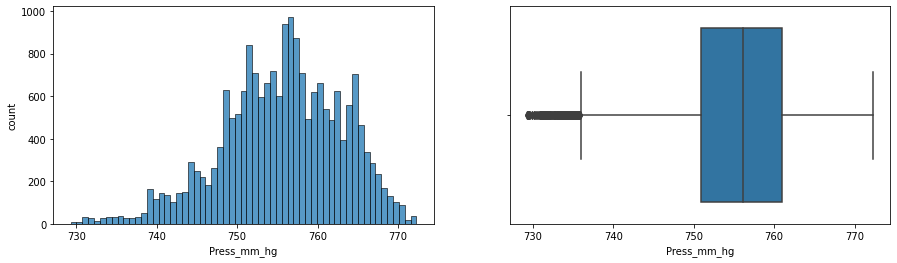

Feature Name : RH_out
Skew : -0.92


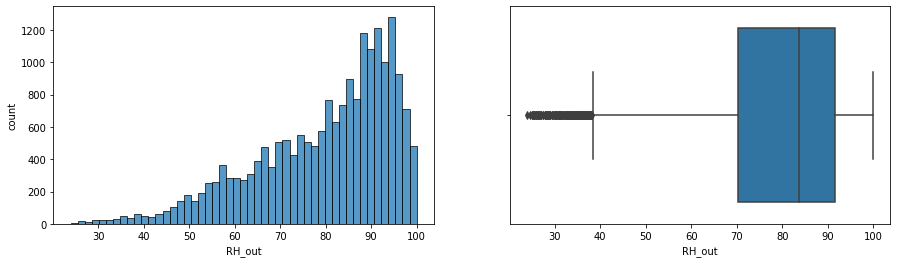

Feature Name : Windspeed
Skew : 0.86


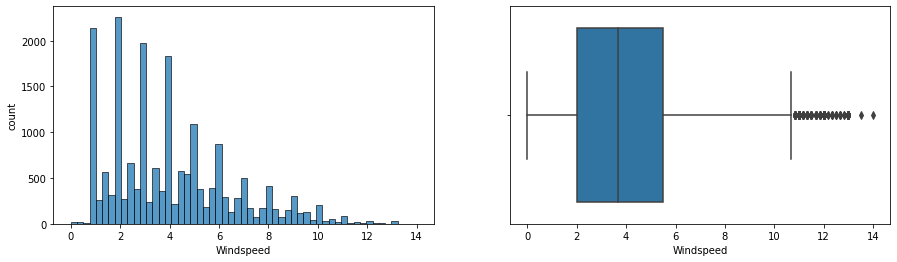

Feature Name : Visibility
Skew : 0.44


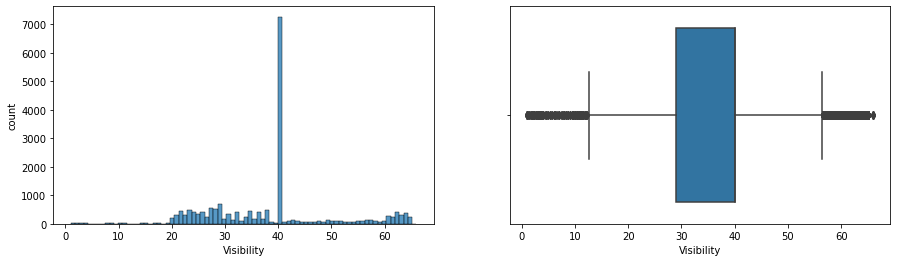

Feature Name : Tdewpoint
Skew : 0.24


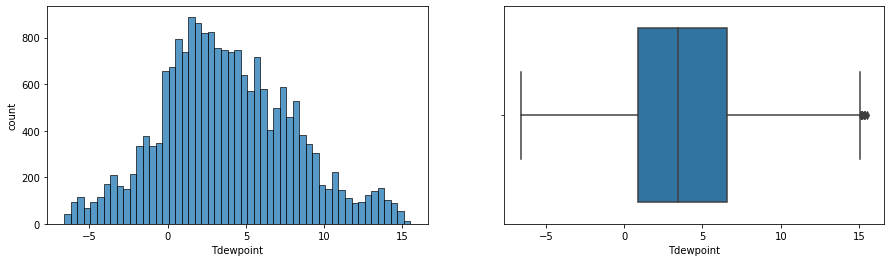

In [ ]:
for col in data.loc[:, data.columns != 'date']:
    print('Feature Name :',col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=data[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Insights

From hist plots and box plots we can learn following key points :-

- Almost all continuous features show normal distribution without many outliers.
- For target variable appliance the mean value is 100 Wh reading and clear outliers at 1080 meter reading.

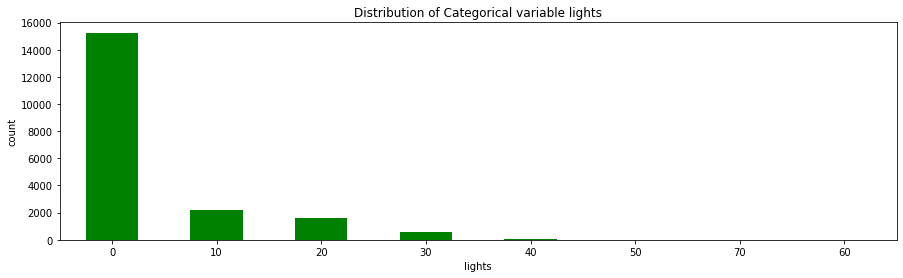

In [ ]:
for col in categ_col:
   
    plt.figure(figsize = (15, 4))
    data[col].value_counts(sort=True).plot(
        kind='bar', color='g', rot=0)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.title("Distribution of Categorical variable "+ col)
    plt.show()

From the count plots, we can get following observations:-


Primary value for energy use of light fixtures is 0 in Wh. 

## EDA Bivariate Analysis

In [ ]:
data.shape

(19735, 26)

In [ ]:
## Selecting features in groups
Inside_meter_readings_cols  = ["Appliances",
"lights",
"T1",
"RH_1",
"T2",
"RH_2", 
"T3", 
"RH_3", 
"T4",
"RH_4", 
"T5", 
"RH_5", 
"T7",
"RH_7", 
"T8", 
"RH_8", 
"T9", 
"RH_9"]

In [ ]:
Outside_meter_readings_cols = ["Appliances", "T6", 
"RH_6", "T_out","Press_mm_hg", "RH_out", "Windspeed",
"Visibility",
"Tdewpoint"]

In [ ]:
g = sns.PairGrid(data[Inside_meter_readings_cols].head(10))
g.map(sns.scatterplot)

Insights drawn from pair plots:

- From Inside meter readings we see strong correlation in between multiple features giving rise to multi collinearity.
- For the majority of tempreture readings inside rooms they are positively corelated example laundry room, bathroom and kitch have similar readings for humidity and tempreture. 
- Relation between these inside building features and target appliances is not direct. No strong correlation for any single feature with target is observed.

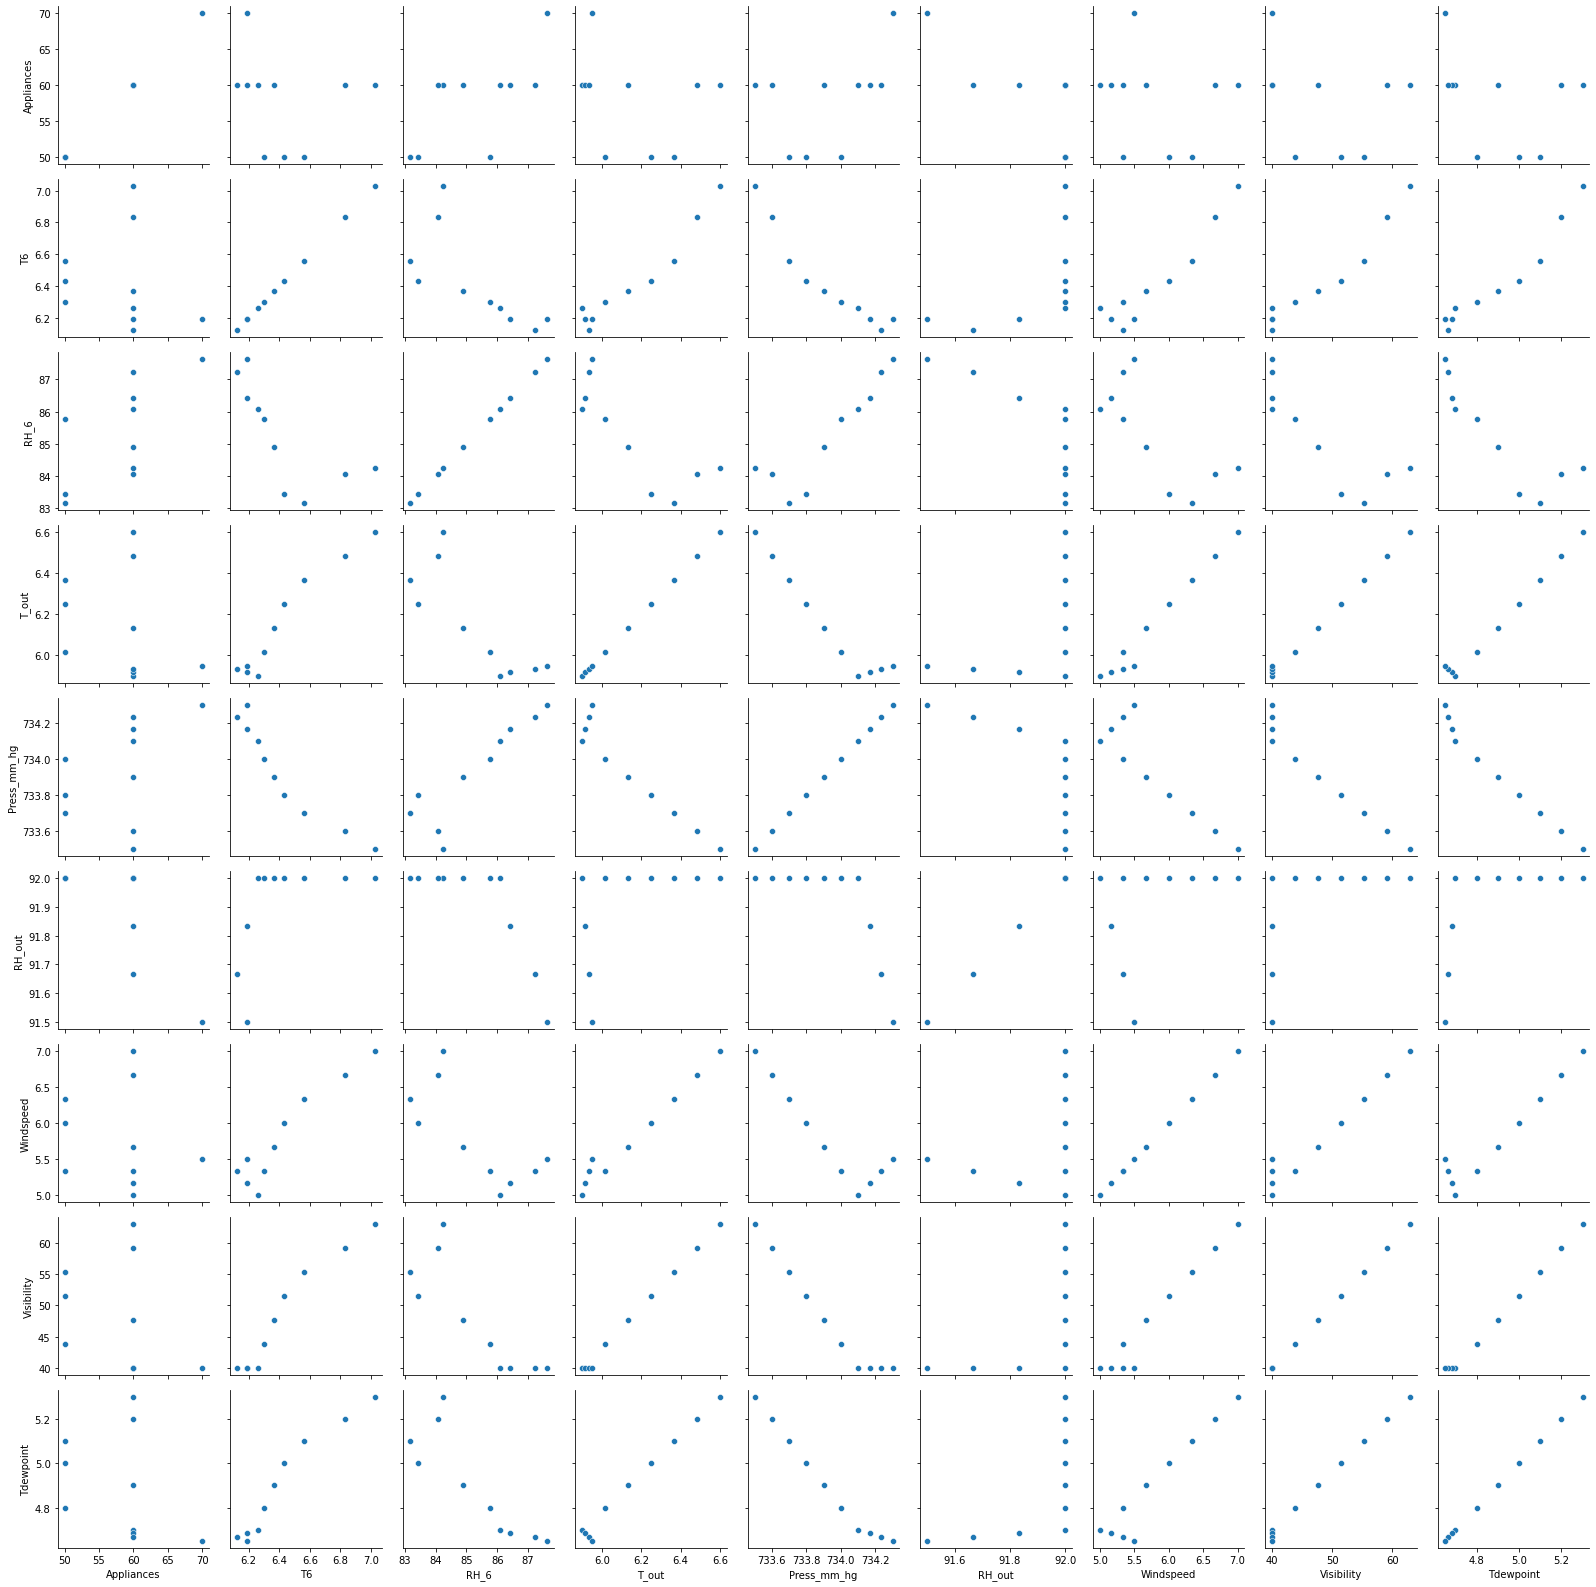

In [ ]:
g = sns.PairGrid(data[Outside_meter_readings_cols].head(10))
g.map(sns.scatterplot)

Insights drawn from pair plots:

- From outside meter readings we see strong correlation between multiple features.
- For the majority of tempreture readings outside rooms they are positively corelated example T6 is highly correlated with T_out and Tdewpoint.
- Relation between these outside building features and target appliances is not direct. No strong correlation for any single feature with target is observed.

## EDA Multivariate Analysis



In [ ]:
data.corr()

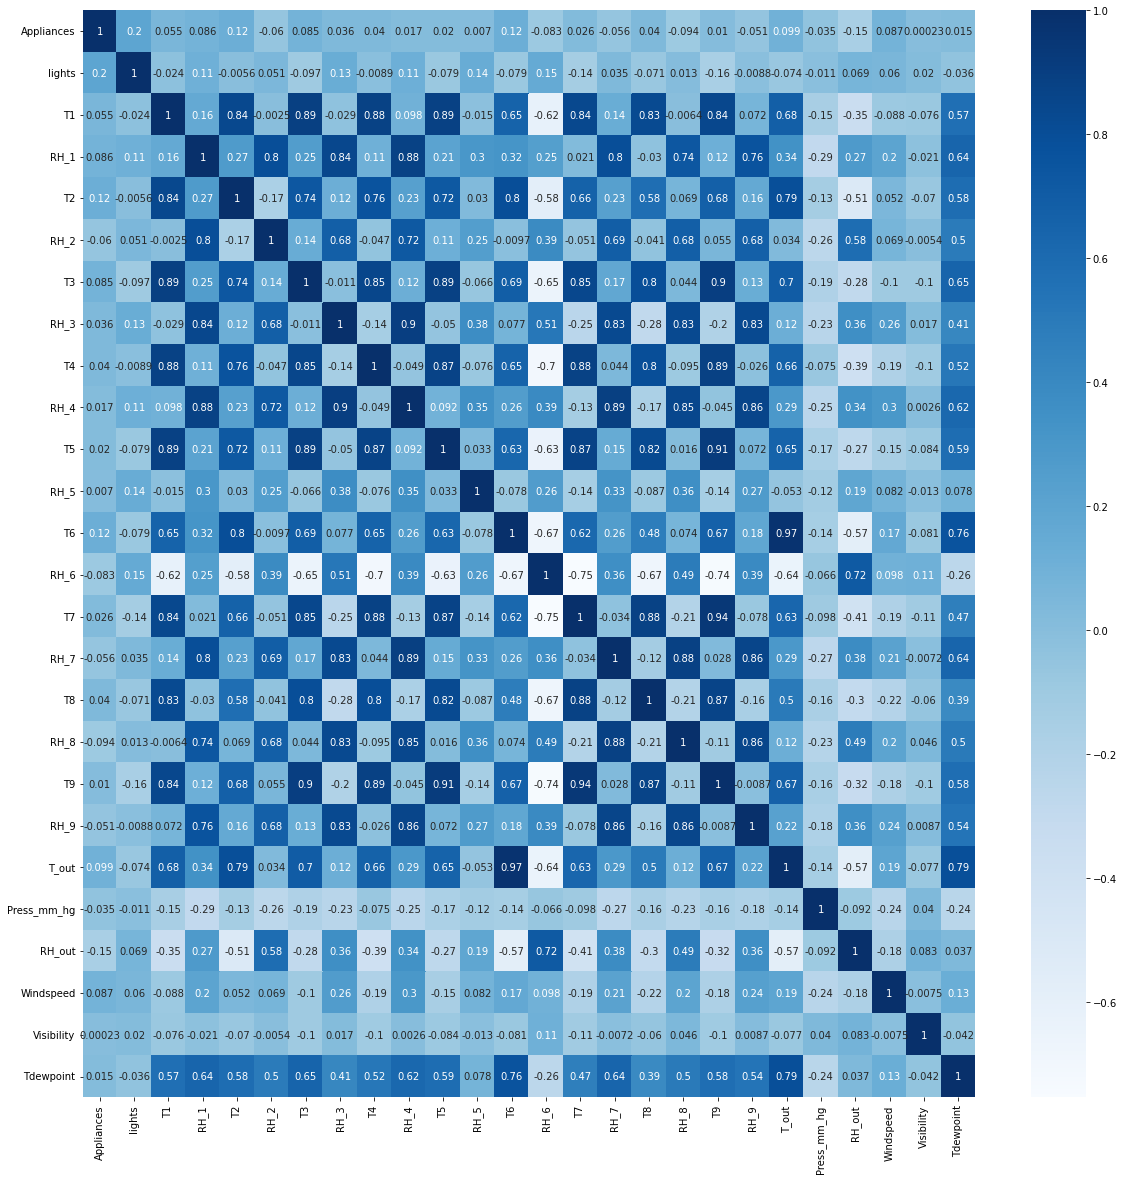

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

Insigths

From the Heat map, we can conculde the following:

- No strong positive correlation was observed between target values and any particular feature.
- But the features are strongly correlated with each other giving rise to multi-collinearity.

## Define features and labels

In [ ]:
data['Appliances'].unique()

array([  60,   50,   70,  230,  580,  430,  250,  100,   90,   80,  140,
        120,  190,  110,  400,  390,  240,   40,   30,  310,  380,  370,
         20,  260,  500,  450,  220,  170,  290,  130,  200,  210,  180,
        350,  300,  340,  150,  330,  420,  520,  360,  270,  550,  690,
        620,  610,  490,  410,  320,  740,  910,  510,  790,  460,  160,
        480,  280,  560, 1080,  750,  470,  440,  800,  540,  530,  660,
        630,  600,   10,  570,  830, 1070,  890,  590,  850,  710,  680,
        670,  780,  640,  650,  700,  770,  720,  760,  860,  880,  730,
        900,  820,  870,  840])

In [ ]:
data['Appliances'].value_counts()

In [ ]:
# Data contains 13 feature variables and 1 target variable Wine CLASS
# Define features and labels

In [ ]:
y=data["Appliances"].values

In [ ]:
data.loc[:, data.columns != 'Appliances']

In [ ]:
x = data.loc[:, data.columns != 'Appliances'].values

## Feature Scaling

In [ ]:
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
dataTrans.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362


## Split the dataset into training and test dataset 80:20

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=1234)

In [ ]:
Xtrain.shape

(15788, 25)

In [ ]:
Xtest.shape

(3947, 25)

In [ ]:
Ytrain.shape

(15788,)

In [ ]:
Ytest.shape

(3947,)

 ## **a) Create a Lasso regression, decision tree, Random forest, and GradientBoost models. Fit the model using the training dataset and find the model RMSE and R-Square. Explain each model's outcome, finding, and accuracy.**

### Lasso Regression

In [ ]:
sc = StandardScaler()
dfX_tranformed = pd.DataFrame(sc.fit_transform(Xtrain))

lassoModel = LassoRegression(alpha=0.1)
lassoModel.fit(dfX_tranformed.values, Ytrain) 
print("Lasso model cofficients :",lassoModel.coef_)
y_hat = lassoModel.predict(dfX_tranformed.values)
print("Performance Matrics")
print('Lasso Regression - Mean Squared error:', round(mean_squared_error(Ytrain,y_hat),4))
print('Lasso Regression - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytrain,y_hat)])[0],4))
print('Lasso Regression - R-Squared:', round(r2_score(Ytrain,y_hat),4))

Lasso model cofficients : [ 98.00291344  16.6273292   -8.93509724  40.09803072  -1.82847822
 -21.07097758  39.26597827  12.74111437 -11.99937938  -3.45456147
  -9.31723969   1.02596637  13.46603041   1.990263    -2.33486902
 -11.84270492  10.72245114 -21.44676366 -15.06378922  -4.14123341
  -5.515468     0.24377098  -1.32619977   3.72832748   1.55154553
  -3.053121  ]
Performance Matrics
Lasso Regression - Mean Squared error: 8986.3902
Lasso Regression - Root Mean Squared error: 94.7966
Lasso Regression - R-Squared: 0.1527


### Decision Tree regressor

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(Xtrain[0:1000,:],Ytrain[0:1000].reshape(-1,1))

In [ ]:
y_hat = regressor.predict(Xtrain[0:1000,:])

In [ ]:
print('Decision Tree - Mean Squared error:', round(mean_squared_error(Ytrain[0:1000],y_hat),4))
print('Decision Tree - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytrain[0:1000],y_hat)])[0],4))
print('Decision Tree - R-Squared:', round(r2_score(Ytrain[0:1000],y_hat),4))

Decision Tree - Mean Squared error: 7658.1199
Decision Tree - Root Mean Squared error: 87.5107
Decision Tree - R-Squared: 0.3303


### Random Forest

In [ ]:
# create a random forest with default values
rfr = RandomForestRegressor()

In [ ]:
## train the ensemble & view estimates for prediction error ##
rfr.fit(Xtrain[0:500,:],Ytrain[0:500])

In [ ]:
y_hat = rfr.predict(Xtrain)

In [ ]:
print('Random Forest - Mean Squared error:', round(mean_squared_error(Ytrain,y_hat),4))
print('Random Forest - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytrain,y_hat)])[0],4))
print('Random Forest - R-Squared:', round(r2_score(Ytrain,y_hat),4))

Random Forest - Mean Squared error: 8496.2413
Random Forest - Root Mean Squared error: 92.1751
Random Forest - R-Squared: 0.1989


### Gradient Boosting model

In [ ]:
gradBoostModel = GradientBoostTreeRegressor(n_elements=10, learning_rate=0.01)
    
# fit the model
gradBoostModel.fit(Xtrain[0:800,:],Ytrain[0:800])

y_hat = gradBoostModel.predict(Xtrain[0:800])

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(Ytrain[0:800],y_hat),4))
print('Gradient Boost - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytrain[0:800],y_hat)])[0],4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(Ytrain[0:800],y_hat),4))

Gradient Boost Regression - Mean Squared error: 18219.2585
Gradient Boost - Root Mean Squared error: 134.9787
Gradient Boost Regression - R-Squared: -0.6617


## **b) Predict the models using the test dataset, and provide the performance metrics. Compare the four models' performance metrics, and explain at least four findings on each of the models. Do not repeat the code to fit the model.** 

### Lasso Regression

In [ ]:
y_hat = lassoModel.predict(Xtest)

print('Lasso Regression - Mean Squared error:', round(mean_squared_error(Ytest,y_hat),4))
print('Lasso Regression - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytest,y_hat)])[0],4))
print('Lasso Regression - R-Squared:', round(r2_score(Ytest,y_hat),4))

Lasso Regression - Mean Squared error: 58471.7119
Lasso Regression - Root Mean Squared error: 241.8092
Lasso Regression - R-Squared: -4.7733


**Findings**
-  The negative R-squared value is observed for Lasso regression not in training but test set.
- It indicates that your prediction tends to be less accurate that the average value of the data set over time.
- Also the RMSE is increased from 94 for training dataset to 241 in test dataset.
- High error in test dataset as compared to training is pointing to high variance model which is not having correct understanding of relationship between features and target variable.
- Thus Lasso model is high variance and low biased model that is overfit.



- The RMSE value tells that the average deviation between the predicted appliances energy Wh made by the model and the actual energy use in Wh is 240 Wh for test dataset.

- The negative R2 value shows that the independent variables in the model are able to explain very poorly the variation in the target variable appliences.


### Decision Tree regressor

In [ ]:
y_hat = regressor.predict(Xtest[0:1000,:])

In [ ]:
print('Decision Tree - Mean Squared error:', round(mean_squared_error(Ytest[0:1000],y_hat),4))
print('Decision Tree - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytest[0:1000],y_hat)])[0],4))
print('Decision Tree - R-Squared:', round(r2_score(Ytest[0:1000],y_hat),4))

Decision Tree - Mean Squared error: 10611.328
Decision Tree - Root Mean Squared error: 103.0113
Decision Tree - R-Squared: 0.0211


**Findings**
-  The 2% R-squared value is observed for Decision Tree regressor in test set and 33% in training.
- The RMSE value is around 103 for test and 87 in training.
- This RMSE value tells that the average deviation between the predicted values of energy usage we got from decision tree model and the actual house price is around 100.
- The R2 value shows that the independent variables in the model are able to explain very less percentage of the variation in the house prices.
- The values of RMSE showed large increase in the test dataset from training dataset and therefore the model is overfit.


### Random Forest

In [ ]:
## Test dataset used to view estimates for prediction error ##
y_pred = rfr.predict(Xtest[0:500,:])

In [ ]:
print('Random Forest - Mean Squared error:', round(mean_squared_error(Ytest[0:500],y_pred),4))
print('Random Forest - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytest[0:500],y_pred)])[0],4))
print('Random Forest - R-Squared:', round(r2_score(Ytest[0:500],y_pred),4))

Random Forest - Mean Squared error: 10840.3952
Random Forest - Root Mean Squared error: 104.1172
Random Forest - R-Squared: 0.2067


**Findings**

- The RMSE value is increased from 92 to 204 value this shows the model is having low bias and high variance.
- With RF model the value of R2 is improved to 20% giving good relationship between inpit features and target variable and not very high variance as compared to Lasso and decision tree.


### Gradient Boosting model

In [ ]:
y_hat = gradBoostModel.predict(Xtest[0:800])

print('Gradient Boost Regression - Mean Squared error:', round(mean_squared_error(Ytest[0:800],y_hat),4))
print('Gradient Boost - Root Mean Squared error:', round(np.sqrt([mean_squared_error(Ytest[0:800],y_hat)])[0],4))
print('Gradient Boost Regression - R-Squared:', round(r2_score(Ytest[0:800],y_hat),4))

Gradient Boost Regression - Mean Squared error: 19640.7803
Gradient Boost - Root Mean Squared error: 140.1456
Gradient Boost Regression - R-Squared: -0.6479


**Findings**

- For Gradient descent we have observed the low bias and high variance but it is better compared with RF as there is very little increase in RMSE for test.
- RMS value is 134 for training and for test it is 140


## **c) Do you see any bias and variance issues? How do you interpret each model output?**


- Bias is the difference between average prediction value and the actual value of the energy used in Wh. High biased model is oversimplified model which fails to catch input features and target relationship well.
- Variance is measure of spread of data. High variance indicates model which is closely fit to training set and does not generalize well on the unknown dataset.

## Lasso Regression Model

- In the case of Lasso model the RMSE for the test set is very high than that of the thus it is model with low bias and high variance.
- This means the model fit is one tha tests well in sample(training set), but has little predictive value when tested out for unknown dataset.


## Decision Tree Model

- The values of RMSE and R2 showed very little decrease in the test dataset from training dataset for this model
- Overall low RMSE score for trainingt shows low biased model.


## RF

- It is high variance low biased model but as compared to decision tree 


- values in increase of RMSE values from training to test are much improved. 

## Gradient Boost

- It is also high variance low biased model but as compared to RF values in increase of RMSE values from training to test are much improved. 

## **d) Write a function to find important features in each model? Why is it an important feature of the model? Explain with some statistical evidence.**

#### Feature importance for Lasso regression

In [ ]:
lassoImportantfeatures = pd.DataFrame(data={'feature': data.columns})
lassoImportantfeatures["importance"] = pd.DataFrame(lassoModel.coef_[1:])
lassoImportantfeatures = lassoImportantfeatures.sort_values(by='importance', ascending=False)

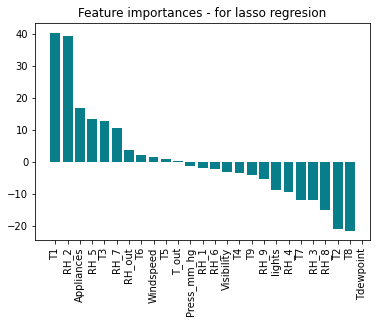

In [ ]:
plt.bar(x=lassoImportantfeatures['feature'], height=lassoImportantfeatures['importance'], color='#087E8B')
plt.title('Feature importances - for lasso regresion')
plt.xticks(rotation='vertical')
plt.show()

- List of importnat features is as shown.
- The model need to be rebilt with these features and checked for RMSE and R2.
- Also the reduced number of features will reduce the complexity of the model and improve the overfitting issue.


#### Feature importance for Decision Tree

In [ ]:
regressor.print_tree()

X_0 <= 0.0 ? 550.0260005891014
 left:X_5 <= 27.463333333333296 ? 399.51508504975664
  left:X_12 <= 11.456 ? 236.11332768020384
    left:X_8 <= 45.2385714285714 ? 7787.139984284897
        left:102.03883495145631
        right:522.0
    right:X_16 <= 43.36 ? 149.41644389248177
        left:87.78364116094987
        right:63.08771929824562
  right:X_1 <= 26.1 ? 22102.083333333332
    left:X_1 <= 24.39 ? 1605.5555555555552
        left:305.0
        right:220.0
    right:620.0
 right:X_14 <= 24.6 ? 1682.7096205454654
  left:X_10 <= 42.66 ? 66736.11111111111
    left:X_0 <= 20.0 ? 6422.222222222222
        left:590.0
        right:760.0
    right:X_0 <= 20.0 ? 1250.0
        left:105.0
        right:180.0
  right:X_17 <= 16.79 ? 1635.1996715747682
    left:X_18 <= 45.56 ? 15750.25
        left:136.0
        right:387.0
    right:X_3 <= 28.73 ? 1162.6620509561599
        left:118.98477157360406
        right:600.0


In [ ]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


For max depth 3 we have optimal tree with following important features in case of single decision tree regressor model.
- T1 - X_1
- T3 - X_5
- RH4 - X_8
- RH_8 - X_16
- T9 - X_17